In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
import matplotlib.pyplot as plt

## Section 1) Summary of your project (10%)
#### (1) As a graduate student whose family income is affected by COVID-19, I often wonder whether I should make some financial investment to reduce the risk of uncertainty. So based on the concept of accurate advertising, we want to know whether it is possible to collect some features of young people through a questionnaire, and then use these features to classify the students. Those students who are willing to use the cash back of the credit card to invest will be the ideal advertising target for financial companies. This will be a classification problem, more specifically a binary problem - use cash back for investment or not.


#### (2) The data is collected through questionnaire that distributed in school, and each question will be served as an input feature in the machine learning model. The questionnaire receives 100 responses from Clark University. Before data analysis, we have to clean and preprocess the data as the response is raw data and some answers have a different format or missing values. After data cleaning, we can choose different machine learning models and apply the selected model to predict students interested in the credit card investing option. Our model's input is the respondents' features in multiple dimensions, from objective age, majors, monthly income, etc. to subjective consumption bills, investment channels, etc. The output of our model is the categories of respondents. Therefore, our project will be a classification model in supervised learning


#### (3) For the questionnaire stage, our success criterion is the number of questionnaires finally available is more than 40. Although we use the SVM algorithm that is not sensitive to the amount of data, we believe that if the data set is too small, it will still be unconvincing. For the stage of building and testing the model, given that the size of our data set is small, then the test set that is divided out will be even smaller, so every correct or wrong prediction will have a notable impact on the accuracy rate. Therefore, based on the size of the test set, we hope that the prediction accuracy rate can be higher than 60%. For our purpose that verifying our conjecture, the 60% accuracy rate is sufficient to show that our direction is correct. The relationship between features and investment willingness is not random. If we have the opportunity to obtain a larger dataset, we are confident that we can obtain a much higher accuracy rate.

## Section 2) Show the code and architecutre of your ML (20%)

### In our project, we used two models to predict output. One is support vector machine; another is random forest. Support vector machine aims to find a hyperplane in an N-dimensional space that distinctly classifies the data points. We choose SVM because the model works with the limited dataset. We also include random forest because the model has feature selection that allow us to select important features and reduce noisy

In [3]:
data = pd.read_csv('shi_and_song_week10_data_clean.csv')
data.head()

,Unnamed: 0,Feature_Age,Label_Option,Feature_Average_income,Feature_Employed_No,Feature_Employed_Yes,Feature_Cashback_spending_Apply to statement balance,Feature_Cashback_spending_Redeem as cash,Feature_Cashback_spending_Use to purchase gift cards,"Feature_Most_expense_Eating out (restaurants, coffee, etc.)","Feature_Most_expense_Entertainment (movies, shows, concerts, etc.)",Feature_Most_expense_Groceries/day-to-day needs,Feature_Most_expense_Other,"Feature_Most_expense_Transportation (Uber, buses, train, subway)",Feature_Most_expense_Travel,Feature_Education_level_Graduate (Masters),Feature_Education_level_Other,Feature_Education_level_Undergraduate
0,2,2.2,0,1.00,0,1,1,0,0,0,0,1,0,0,0,1,0,0
1,4,2.2,1,1.20,0,1,0,1,0,0,0,1,0,0,0,1,0,0
2,5,2.4,1,0.95,1,0,0,1,0,0,0,1,0,0,0,1,0,0
3,6,2.3,1,0.70,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,7,2.2,1,1.30,0,1,1,0,0,1,0,0,0,0,0,1,0,0


In [4]:
# drop unnecessary index
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Feature_Age,Label_Option,Feature_Average_income,Feature_Employed_No,Feature_Employed_Yes,Feature_Cashback_spending_Apply to statement balance,Feature_Cashback_spending_Redeem as cash,Feature_Cashback_spending_Use to purchase gift cards,"Feature_Most_expense_Eating out (restaurants, coffee, etc.)","Feature_Most_expense_Entertainment (movies, shows, concerts, etc.)",Feature_Most_expense_Groceries/day-to-day needs,Feature_Most_expense_Other,"Feature_Most_expense_Transportation (Uber, buses, train, subway)",Feature_Most_expense_Travel,Feature_Education_level_Graduate (Masters),Feature_Education_level_Other,Feature_Education_level_Undergraduate
0,2.2,0,1.00,0,1,1,0,0,0,0,1,0,0,0,1,0,0
1,2.2,1,1.20,0,1,0,1,0,0,0,1,0,0,0,1,0,0
2,2.4,1,0.95,1,0,0,1,0,0,0,1,0,0,0,1,0,0
3,2.3,1,0.70,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,2.2,1,1.30,0,1,1,0,0,1,0,0,0,0,0,1,0,0


## Section 3) Show the output of your model training with your harvested data set (30%)

In [5]:
 # Define a dataframe with only features
data_feat = data.drop("Label_Option",axis=1) 
data_target=data['Label_Option']
#Split train and test set
x = data_feat
y = data_target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=47)

In [6]:
# modle training and accuracy
classL = LinearSVC()
classL.fit(x_train, y_train)
predl_test = classL.predict(x_test)
predl_train = classL.predict(x_train)
print("train accuracy for Linear SVC:",accuracy_score(y_train, predl_train))
print("test accuracy for Linear SVC:",accuracy_score(y_test, predl_test))

train accuracy for Linear SVC: 0.7419354838709677
test accuracy for Linear SVC: 0.5


In [7]:
# Make confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.around((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]),decimals=2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

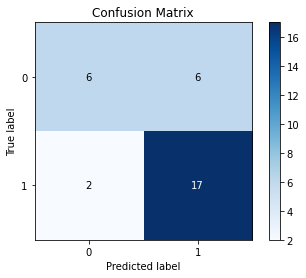

In [8]:
# display confusion matrix for training dataset
skplt.metrics.plot_confusion_matrix(y_train,predl_train, normalize= False)
plt.show()

#### From confusion matrix we can tell that our model performs okay

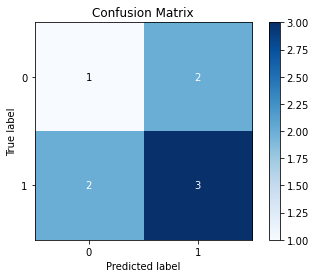

In [9]:
# display confusion matrix for testing dataset
skplt.metrics.plot_confusion_matrix(y_test,predl_test, normalize= False)
plt.show()

#### Our model under performs on test dataset, one of the reason could be overfitting since our dataset is relatively small

## Let's try another model

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [11]:
# train randomforest model 
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [12]:
# check accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.5


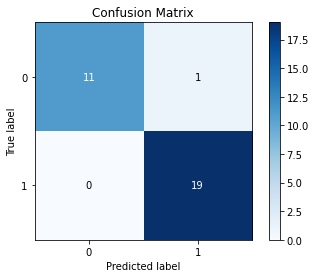

In [13]:
pred_train = clf.predict(x_train)
# display confusion matrix for training dataset
skplt.metrics.plot_confusion_matrix(y_train,pred_train, normalize= False)
plt.show()

### Training dataset seems perform well

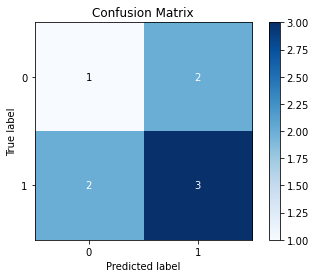

In [14]:
pred_test = clf.predict(x_test)
# display confusion matrix for test dataset
skplt.metrics.plot_confusion_matrix(y_test,pred_test, normalize= False)
plt.show()

### Seems like test dataset for randomforest still underperforms
### Let's apply feature selection see if that helps

In [15]:
# apply feature selection to improve accuracy
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=0))

In [16]:
# transform to selected feature
x_train_rfc = sel.transform(x_train)
x_test_rfc = sel.transform(x_test)

## Suprisingly, only two features were selected

In [17]:
# features that selected
x_train.columns[sel.get_support()]

Index(['Feature_Age', 'Feature_Average_income'], dtype='object')

In [18]:
# run model
clf.fit(x_train_rfc, y_train)
y_pred = clf.predict(x_test_rfc)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.75


## This time accuracy is still unsatisfied but it improved a lot

## Section 4) Save your ML model for distribution (10%)

In [19]:
# save model
import pickle
RF_Filename = "Pickle_RF_Model.pkl"  

with open(RF_Filename, 'wb') as file:  
    pickle.dump(clf, file)

In [20]:
# Load the Model back from file
with open(RF_Filename, 'rb') as file:  
    Shi_Song_week11_Model = pickle.load(file)

Shi_Song_week11_Model

RandomForestClassifier(n_jobs=-1, random_state=0)

## Section 5) Inference test of your model (20%)

### Since the data is collected from university, this limit our model that it only works for students. Though the model estimates universal features and predict output, the result won't be accurate because the model is trained specifically for data from students. In another words, the algorithm recognizes patterns or relationship in students data and won't perform well if the data jump out of the scope. 

### I collected my roommate's information to test the model

### Since the improved model only takes two feature, I created a dataset that contains my roommates' information. All three of them like the idea and would like to apply a credit card that they can invest with cash bonus

In [21]:
# create dataset
df_feature = pd.DataFrame(np.array([[37, 1000], [26, 800], [25, 700]]),
                   columns=['age','average_income'])

In [22]:
# scale income and age
df_feature["age"] = df_feature["age"].apply(lambda x: x/10)
df_feature["average_income"] = df_feature["average_income"].apply(lambda x: x/1000)
df_feature

,age,average_income
0,3.7,1.0
1,2.6,0.8
2,2.5,0.7


In [23]:
# convert output to list
result = Shi_Song_week11_Model.predict(df_feature).tolist()

In [24]:
# print output
for a in result:
    if a == 1:
        print('students would like to try investing with credit card')
    else:
        print('students would not like to try investing with credit card')


students would like to try investing with credit card
students would like to try investing with credit card
students would not like to try investing with credit card


### The model successful predict the two outcomes and failed on one

## Section 6) Summary (10%)

### In general, our model didn't perform well. I tried with different samples and somehow the model has a high bias in invest option. Main reason is the limition of the dataset. Perhaps there are other key features that we didn't include in our survey. We should do more research in students' financial behavior and dig deeper to identify more features that may explain students' financial choice